In [1]:
from __future__ import division
import pandas as pd
import cv2
from matplotlib import pyplot as plt
import os
import matplotlib
import numpy as np
import random
from numpy import linalg as LA
from PIL import Image
import sys
import itertools
from skimage import filters
from scipy import ndimage
from sklearn.model_selection import train_test_split  
from sklearn.svm import SVC 
from sklearn.metrics import classification_report, confusion_matrix ,accuracy_score
from skimage import color
from skimage.feature import hog
from sklearn import svm
from sklearn.metrics import accuracy_score
import re
# import tensorflow as tf
# import keras

In [4]:
cap = cv2.VideoCapture('test.avi')

In [187]:
s = '186-245,'
t = s.split(',')[0]
print(s.split(',')[0].split('-')[0])

186


In [3]:
file = open('KTHDataset/00sequences.txt', 'r') 
name = 'frames'
lines = file.readlines()
d = {}
for i in lines:
    if name in i:
        s = i.split("\t")
#         print(s)
        p = s[0]
        k = s.index('frames')
#         result = re.sub('[^0-9]',' ', i)
        a = np.array([])
        s = s[k+1].split(',')
#         print(s)
        for i in range(0,len(s)):
#             print(s[i])
            a = np.append(a,np.arange(int(s[i].split('-')[0]),int(s[i].split('-')[1])))
        d[p] = a

In [4]:
d

{'person01_boxing_d1': array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
         12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
         23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
         34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
         45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
         56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
         67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
         78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
         89.,  90.,  91.,  92.,  93.,  94.,  96.,  97.,  98.,  99., 100.,
        101., 102., 103., 104., 105., 106., 107., 108., 109., 110., 111.,
        112., 113., 114., 115., 116., 117., 118., 119., 120., 121., 122.,
        123., 124., 125., 126., 127., 128., 129., 130., 131., 132., 133.,
        134., 135., 136., 137., 138., 139., 140., 141., 142., 143., 144.,
        145., 14

In [5]:
# while True:
#     ret, frame = cap.read()
#     gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
#     cv2.imshow('frame',frame)
#     cv2.imshow('grayF',gray)
#     if cv2.waitKey(1) & 0xFF == ord('q'):
#          break

# cap.release()
# cv2.destroyAllWindows()

In [2]:
# import numpy as np
# import cv2

# cap = cv2.VideoCapture('test.avi')

# while(cap.isOpened()):
#     ret, frame = cap.read()

#     gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

#     cv2.imshow('frame',gray)
#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break

# cap.release()
# cv2.destroyAllWindows()

In [4]:
'''
Using OpenCV takes a mp4 video and produces a number of images.
Requirements
----
You require OpenCV 3.2 to be installed.
Run
----
Open the main.py and edit the path to the video. Then run:
$ python main.py
Which will produce a folder called data with the images. There will be 2000+ images for example.mp4.
'''
X = []

# Playing video from file:
cap = cv2.VideoCapture('test.avi')

# try:
#     if not os.path.exists('data'):
#         os.makedirs('data')
# except OSError:
#     print ('Error: Creating directory of data')

currentFrame = 0
while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()
    if not ret: break
    # Saves image of the current frame in jpg file
    X.append(frame)
#     name = './data/frame' + str(currentFrame) + '.jpg'
#     print ('Creating...' + name)
#     cv2.imwrite(name, frame)

# #     To stop duplicate images
    currentFrame += 1

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

Creating..../data/frame0.jpg
Creating..../data/frame1.jpg
Creating..../data/frame2.jpg
Creating..../data/frame3.jpg
Creating..../data/frame4.jpg
Creating..../data/frame5.jpg
Creating..../data/frame6.jpg
Creating..../data/frame7.jpg
Creating..../data/frame8.jpg
Creating..../data/frame9.jpg
Creating..../data/frame10.jpg
Creating..../data/frame11.jpg
Creating..../data/frame12.jpg
Creating..../data/frame13.jpg
Creating..../data/frame14.jpg
Creating..../data/frame15.jpg
Creating..../data/frame16.jpg
Creating..../data/frame17.jpg
Creating..../data/frame18.jpg
Creating..../data/frame19.jpg
Creating..../data/frame20.jpg
Creating..../data/frame21.jpg
Creating..../data/frame22.jpg
Creating..../data/frame23.jpg
Creating..../data/frame24.jpg
Creating..../data/frame25.jpg
Creating..../data/frame26.jpg
Creating..../data/frame27.jpg
Creating..../data/frame28.jpg
Creating..../data/frame29.jpg
Creating..../data/frame30.jpg
Creating..../data/frame31.jpg
Creating..../data/frame32.jpg
Creating..../data/fr

Creating..../data/frame534.jpg
Creating..../data/frame535.jpg
Creating..../data/frame536.jpg
Creating..../data/frame537.jpg
Creating..../data/frame538.jpg
Creating..../data/frame539.jpg
Creating..../data/frame540.jpg
Creating..../data/frame541.jpg
Creating..../data/frame542.jpg
Creating..../data/frame543.jpg
Creating..../data/frame544.jpg
Creating..../data/frame545.jpg
Creating..../data/frame546.jpg
Creating..../data/frame547.jpg
Creating..../data/frame548.jpg
Creating..../data/frame549.jpg
Creating..../data/frame550.jpg
Creating..../data/frame551.jpg
Creating..../data/frame552.jpg
Creating..../data/frame553.jpg
Creating..../data/frame554.jpg


In [21]:
X = np.array(X)

In [22]:
X.shape

(555, 120, 160, 3)

In [4]:
len(X[2][0])

160

In [6]:
blur = cv2.GaussianBlur(X[17],(5,5),0)

In [5]:
for i in range(len(X)):
    X[i] = cv2.GaussianBlur(X[i],(5,5),0)

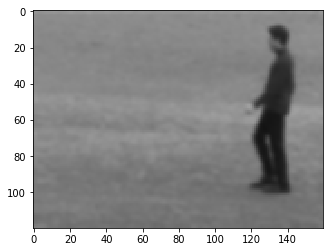

In [13]:
plt.imshow(blur)
plt.show()

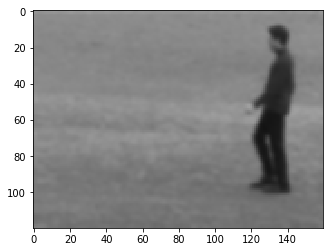

In [6]:
plt.imshow(X[17])
plt.show()

In [13]:
g_kernel = cv2.getGaborKernel((21, 21), 8.0, np.pi/4, 10.0, 0.5, 0, ktype=cv2.CV_32F)


img = cv2.cvtColor(X[17], cv2.COLOR_BGR2GRAY)
filtered_img = cv2.filter2D(img, cv2.CV_8UC3, g_kernel)

# cv2.imshow('image', img)
# cv2.imshow('filtered image', filtered_img)

h, w = g_kernel.shape[:2]
g_kernel = cv2.resize(filtered_img, (3*w, 3*h), interpolation=cv2.INTER_CUBIC)

In [20]:
g_kernel = cv2.getGaborKernel((1,1, 5), 8.0, np.pi/4, 10.0, 0.5, 0, ktype=cv2.CV_32F)

TypeError: function takes exactly 2 arguments (3 given)

In [19]:
g_kernel

array([[-0.19248143,  0.22732863,  0.6183222 ,  0.89152646,  0.9844964 ],
       [ 0.22732863,  0.6207422 ,  0.89851874,  0.9961014 ,  0.89152646],
       [ 0.6183222 ,  0.89851874,  1.        ,  0.89851874,  0.6183222 ],
       [ 0.89152646,  0.9961014 ,  0.89851874,  0.6207422 ,  0.22732863],
       [ 0.9844964 ,  0.89152646,  0.6183222 ,  0.22732863, -0.19248143]],
      dtype=float32)

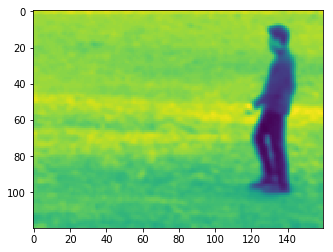

In [15]:
plt.imshow(img)
plt.show()

In [30]:


# Create a 3x3 Gabor filter
params = {'ksize':(3, 3), 'sigma':1.0, 'theta': 0, 'lambd':15.0, 'gamma':0.02}
filter = cv2.getGaborKernel(**params)
# make the filter to have 4 dimensions.
filter = tf.expand_dims(filter, 2)
filter = tf.expand_dims(filter, 3)

# Apply the filter on `image`
answer = tf.conv2d(X[17], filter, strides=[1, 1, 1, 1], padding='SAME')

AttributeError: module 'tensorflow' has no attribute 'conv2d'

In [40]:
keras.layers.Conv2D(filter, (3, 3), strides=(1, 1), padding='valid', data_format=None, dilation_rate=(1, 1), activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None)

AttributeError: module 'tensorflow' has no attribute 'get_default_graph'

In [4]:
cap = cv2.VideoCapture('test.avi')

# params for ShiTomasi corner detection
feature_params = dict( maxCorners = 100,
                       qualityLevel = 0.3,
                       minDistance = 7,
                       blockSize = 7 )

# Parameters for lucas kanade optical flow
lk_params = dict( winSize  = (15,15),
                  maxLevel = 2,
                  criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

# Create some random colors
color = np.random.randint(0,255,(100,3))

# Take first frame and find corners in it
ret, old_frame = cap.read()
old_gray = cv2.cvtColor(old_frame, cv2.COLOR_BGR2GRAY)
p0 = cv2.goodFeaturesToTrack(old_gray, mask = None, **feature_params)

# Create a mask image for drawing purposes
mask = np.zeros_like(old_frame)

while(1):
    ret,frame = cap.read()
    if not ret: break
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # calculate optical flow
    p1, st, err = cv2.calcOpticalFlowPyrLK(old_gray, frame_gray, p0, None, **lk_params)
    if len(frame) == 0:
        break
    # Select good points
    good_new = p1[st==1]
    good_old = p0[st==1]

    # draw the tracks
    for i,(new,old) in enumerate(zip(good_new,good_old)):
        a,b = new.ravel()
        c,d = old.ravel()
        mask = cv2.line(mask, (a,b),(c,d), color[i].tolist(), 2)
        frame = cv2.circle(frame,(a,b),5,color[i].tolist(),-1)
    img = cv2.add(frame,mask)

#     cv2.imshow('frame',img)
#     k = cv2.waitKey(30) & 0xff
#     if k == 27:
#         break

    # Now update the previous frame and previous points
    old_gray = frame_gray.copy()
    p0 = good_new.reshape(-1,1,2)

# cv2.destroyAllWindows()
# cap.release()

TypeError: 'NoneType' object is not subscriptable

In [11]:
p0

array([], shape=(0, 1, 2), dtype=float32)

In [2]:
X = []
XX = []
cap = cv2.VideoCapture("test.avi")

ret, frame1 = cap.read()
prvs = cv2.cvtColor(frame1,cv2.COLOR_BGR2GRAY)
hsv = np.zeros_like(frame1)
hsv[...,1] = 255

while(1):
    ret, frame2 = cap.read()
    if not ret: break
#     frame2 = cv2.resize(frame2,(50,50))
    next = cv2.cvtColor(frame2,cv2.COLOR_BGR2GRAY)
    
    flow = cv2.calcOpticalFlowFarneback(prvs,next, None, 0.5, 3, 15, 3, 5, 1.2, 0)
#     print(flow.shape)
    X.append(next)
    
    mag, ang = cv2.cartToPolar(flow[...,0], flow[...,1])
    
    hsv[...,0] = ang*180/np.pi/2
    hsv[...,2] = cv2.normalize(mag,None,0,255,cv2.NORM_MINMAX)
    rgb = cv2.cvtColor(hsv,cv2.COLOR_HSV2BGR)
    o = cv2.cvtColor(rgb,cv2.COLOR_BGR2GRAY)
#     print(o.shape)
    XX.append(o)
    frame2 = cv2.Laplacian(frame2,cv2.CV_64F)
    cv2.imshow('frame2',o)
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break
    elif k == ord('s'):
        cv2.imwrite('opticalfb.png',frame2)
        cv2.imwrite('opticalhsv.png',rgb)
    prvs = next

cap.release()
cv2.destroyAllWindows()
X = np.array(X)
XX = np.array(XX)

In [5]:
print(X.shape)
print(XX.shape)

(554, 120, 160)
(554, 120, 160)


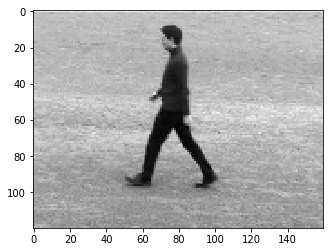

In [6]:
plt.imshow(X[37],'gray')
plt.show()

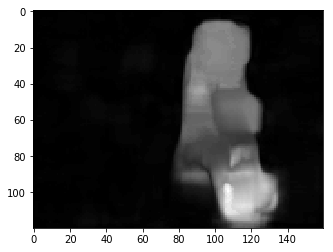

In [7]:
plt.imshow(XX[197],'gray')
plt.show()

In [7]:
c = XX[37] - XX[48]

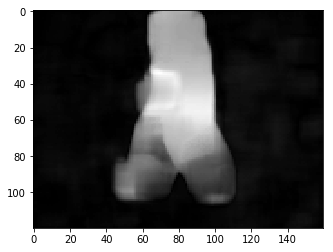

In [8]:
plt.imshow(XX[37],'gray')
plt.show()

In [59]:
XX[87][0].shape

(160,)

In [63]:
sum(sum(XX[107]/XX[107].shape[1]))/(XX[107].shape[0])

25.696302083333332

In [65]:
sum(sum(XX[197]/XX[197].shape[1]))/(XX[197].shape[0])

9.95609375

In [84]:
edges = filters.sobel(X[37])

In [17]:
laplacian = cv2.Laplacian(X[37],cv2.CV_64F)

In [10]:
def read_data1(directory,count):
    dataset = []
    label = []
    for root, dirs, files in os.walk(directory):
        ext = ['.avi']
        if not (root == directory):
            key = root.split('\\')[1]
    #             dataset[key] = []
        c = count
        for name in files:
            filename, file_extension = os.path.splitext(name)
            if file_extension not in ext:
                continue
            if 'd1' in name.split('_'):
                print(directory+'/'+key+'/'+name)
#                 cap = cv2.VideoCapture(directory+'/'+key+'/'+name)
                XX = []
                X = []
                cap = cv2.VideoCapture(directory+'/'+key+'/'+name)
                ret, frame1 = cap.read()
                prvs = cv2.cvtColor(frame1,cv2.COLOR_BGR2GRAY)
                hsv = np.zeros_like(frame1)
                hsv[...,1] = 255
                frame_n = 1
                while(1):
                    ret, frame2 = cap.read()
                    if not ret: break

                #     frame2 = cv2.resize(frame2,(50,50))
                    next = cv2.cvtColor(frame2,cv2.COLOR_BGR2GRAY)

                    flow = cv2.calcOpticalFlowFarneback(prvs,next, None, 0.5, 3, 15, 3, 5, 1.2, 0)
                #     print(flow.shape)

                    mag, ang = cv2.cartToPolar(flow[...,0], flow[...,1])

                    hsv[...,0] = ang*180/np.pi/2
                    hsv[...,2] = cv2.normalize(mag,None,0,255,cv2.NORM_MINMAX)
                    rgb = cv2.cvtColor(hsv,cv2.COLOR_HSV2BGR)
                    o = cv2.cvtColor(rgb,cv2.COLOR_BGR2GRAY)
                #     print(o.shape)
                    if frame_n in d[re.sub('_uncomp','', filename)]:
                #         print(frame_n)
                        XX.append(o)
                        X.append(next)
                    frame_n += 1
                #     frame2 = cv2.Laplacian(frame2,cv2.CV_64F)
                #     cv2.imshow('frame2',o)
                #     k = cv2.waitKey(30) & 0xff
                #     if k == 27:
                #         break
                #     elif k == ord('s'):
                #         cv2.imwrite('opticalfb.png',frame2)
                #         cv2.imwrite('opticalhsv.png',rgb)
                    prvs = next
                cap.release()
                cv2.destroyAllWindows()
                XX = np.array(XX)
                X = np.array(X)
                lXX = []
                lX = []
                for i in range(len(XX)):
                    lXX.append(cv2.Canny(XX[i],100,200))
                    lX.append(cv2.Canny(X[i],100,200))
                lXX = np.array(lXX)
                lX = np.array(lX)
                z = []
                lXX[lXX<0]=0
                for i in range(len(lXX)):
                    z.append((i,np.count_nonzero(lXX[i])))  
                z.sort(key=lambda x: x[1],reverse=True)
                z = z[0:150]
                zz = []
                for i in z:
                    zz.append(i[0])
                zz.sort()
                f = []
                for i in range(len(lXX)):
                    if i in zz:
                        f.append(cv2.resize(lXX[i],(50,50)))
                f = np.array(f)
                f = f.flatten()
                f = f[np.nonzero(f)]
                print(f.shape)
                dataset.append(f)
                label.append(key)
                c -=1
            if c == 0:
                break
    return dataset,label

In [230]:
def read_data(directory,count):
    dataset = []
    label = []
    for root, dirs, files in os.walk(directory):
        ext = ['.avi']
        if not (root == directory):
            key = root.split('\\')[1]
    #             dataset[key] = []
        c = count
        for name in files:
            filename, file_extension = os.path.splitext(name)
            if file_extension not in ext:
                continue
            if 'd1' in name.split('_'):
                print(directory+'/'+key+'/'+name)
#                 cap = cv2.VideoCapture(directory+'/'+key+'/'+name)
                XX = []
                X = []
                cap = cv2.VideoCapture(directory+'/'+key+'/'+name)
                ret, frame1 = cap.read()
                prvs = cv2.cvtColor(frame1,cv2.COLOR_BGR2GRAY)
                hsv = np.zeros_like(frame1)
                hsv[...,1] = 255

                while(1):
                    ret, frame2 = cap.read()
                    if not ret: break
                #     frame2 = cv2.resize(frame2,(50,50))
                    next = cv2.cvtColor(frame2,cv2.COLOR_BGR2GRAY)
                    X.append(next)
                    flow = cv2.calcOpticalFlowFarneback(prvs,next, None, 0.5, 3, 15, 3, 5, 1.2, 0)
                #     print(flow.shape)

                    mag, ang = cv2.cartToPolar(flow[...,0], flow[...,1])

                    hsv[...,0] = ang*180/np.pi/2
                    hsv[...,2] = cv2.normalize(mag,None,0,255,cv2.NORM_MINMAX)
                    rgb = cv2.cvtColor(hsv,cv2.COLOR_HSV2BGR)
                    o = cv2.cvtColor(rgb,cv2.COLOR_BGR2GRAY)
                #     print(o.shape)
                    XX.append(o)
#                     frame2 = cv2.Laplacian(frame2,cv2.CV_64F)
#                     cv2.imshow('frame2',o)
#                     k = cv2.waitKey(30) & 0xff
#                     if k == 27:
#                         break
#                     elif k == ord('s'):
#                         cv2.imwrite('opticalfb.png',frame2)
#                         cv2.imwrite('opticalhsv.png',rgb)
                    prvs = next
#                 cap.release()
#                 cv2.destroyAllWindows()
                XX = np.array(XX)
                X = np.array(X)
                lXX = []
                lX = []
                for i in range(len(XX)):
                    lXX.append(cv2.Canny(XX[i],100,200))
                    lX.append(cv2.Canny(X[i],100,200))
                lXX = np.array(lXX)
                lX = np.array(lX)
                z = []
                for i in range(len(lX)):
                    z.append((i,np.count_nonzero(lX[i])))  
                z.sort(key=lambda x: x[1],reverse=True)
                z = z[0:150]
                zz = []
                for i in z:
                    zz.append(i[0])
                zz.sort()
                f = []
                for i in range(len(lX)):
                    if i in zz:
                        f.append(cv2.resize(lX[i],(50,50)))
                f = np.array(f)
                f = f.flatten()
                f = f[np.nonzero(f)]
                print(f.shape)
                dataset.append(f)
                label.append(key)
                c -=1
            if c == 0:
                break
    return dataset,label

In [125]:
directory = './KTHDataset'
count = 15
dataset,label = read_data1(directory,count)

./KTHDataset/boxing/person01_boxing_d1_uncomp.avi
(7202,)
./KTHDataset/boxing/person02_boxing_d1_uncomp.avi
(7487,)
./KTHDataset/boxing/person03_boxing_d1_uncomp.avi
(8561,)
./KTHDataset/boxing/person04_boxing_d1_uncomp.avi
(11476,)
./KTHDataset/boxing/person05_boxing_d1_uncomp.avi
(6873,)
./KTHDataset/boxing/person06_boxing_d1_uncomp.avi
(7449,)
./KTHDataset/boxing/person07_boxing_d1_uncomp.avi
(7893,)
./KTHDataset/boxing/person08_boxing_d1_uncomp.avi
(7477,)
./KTHDataset/boxing/person09_boxing_d1_uncomp.avi
(8067,)
./KTHDataset/boxing/person10_boxing_d1_uncomp.avi
(7484,)
./KTHDataset/boxing/person11_boxing_d1_uncomp.avi
(11811,)
./KTHDataset/boxing/person12_boxing_d1_uncomp.avi
(8919,)
./KTHDataset/boxing/person13_boxing_d1_uncomp.avi
(10655,)
./KTHDataset/boxing/person14_boxing_d1_uncomp.avi
(13362,)
./KTHDataset/boxing/person15_boxing_d1_uncomp.avi
(7796,)
./KTHDataset/handclapping/person01_handclapping_d1_uncomp.avi
(7480,)
./KTHDataset/handclapping/person02_handclapping_d1_uncom

In [126]:
print(len(dataset))
print(len(label))

75
75


In [127]:
minn = sys.maxsize
for i in dataset:
    minn = min(len(i),minn)
minn

6641

In [128]:
for i in range(len(dataset)):
    dataset[i] = dataset[i][:minn]

In [129]:
for i in range(len(label)):
    dataset[i] = np.append(dataset[i],label[i])

In [130]:
df = pd.DataFrame(dataset)

In [131]:
df.to_csv("video_data.csv", sep='\t',index = None)

In [132]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,6632,6633,6634,6635,6636,6637,6638,6639,6640,6641
0,76,76,54,179,76,76,69,3,229,229,...,242,206,232,255,178,76,38,89,148,boxing
1,23,229,229,229,229,232,69,201,130,229,...,23,76,125,247,13,128,128,166,25,boxing
2,206,229,229,229,229,201,25,76,25,76,...,179,229,76,247,229,237,23,229,179,boxing
3,26,94,13,64,242,94,229,186,25,178,...,38,242,26,217,191,128,128,128,186,boxing
4,179,179,8,26,186,23,217,64,178,76,...,76,76,179,179,179,179,18,229,127,boxing


In [133]:
X = df.drop(6641, axis=1)  
Y = df[6641]

In [134]:
len(list(X))

6641

In [135]:
X = X.astype(int)

In [136]:
X['mean'] = X.sum(axis=1)/len(list(X))

In [137]:
for i in list(X):
    if i == 'mean':
        continue
    X[i] = X[i] - X['mean']

In [138]:
X = X.drop('mean', axis=1)  

In [139]:
X

,0,1,2,3,4,5,6,7,8,9,...,6631,6632,6633,6634,6635,6636,6637,6638,6639,6640
0,-42.886011,-42.886011,-64.886011,60.113989,-42.886011,-42.886011,-49.886011,-115.886011,110.113989,110.113989,...,8.113989,123.113989,87.113989,113.113989,136.113989,59.113989,-42.886011,-80.886011,-29.886011,29.113989
1,-93.959795,112.040205,112.040205,112.040205,112.040205,115.040205,-47.959795,84.040205,13.040205,112.040205,...,100.040205,-93.959795,-40.959795,8.040205,130.040205,-103.959795,11.040205,11.040205,49.040205,-91.959795
2,86.144707,109.144707,109.144707,109.144707,109.144707,81.144707,-94.855293,-43.855293,-94.855293,-43.855293,...,109.144707,59.144707,109.144707,-43.855293,127.144707,109.144707,117.144707,-96.855293,109.144707,59.144707
3,-94.024243,-26.024243,-107.024243,-56.024243,121.975757,-26.024243,108.975757,65.975757,-95.024243,57.975757,...,7.975757,-82.024243,121.975757,-94.024243,96.975757,70.975757,7.975757,7.975757,7.975757,65.975757
4,59.560157,59.560157,-111.439843,-93.439843,66.560157,-96.439843,97.560157,-55.439843,58.560157,-43.439843,...,135.560157,-43.439843,-43.439843,59.560157,59.560157,59.560157,59.560157,-101.439843,109.560157,7.560157
5,60.075591,-42.924409,-42.924409,-42.924409,-42.924409,-42.924409,-42.924409,87.075591,110.075591,110.075591,...,-95.924409,-92.924409,-93.924409,8.075591,60.075591,-80.924409,47.075591,-49.924409,-80.924409,-42.924409
6,-113.655624,-108.655624,23.344376,-103.655624,-27.655624,11.344376,61.344376,-103.655624,10.344376,-91.655624,...,-62.655624,-108.655624,62.344376,-27.655624,-40.655624,-22.655624,112.344376,112.344376,112.344376,-93.655624
7,-96.807710,-96.807710,-43.807710,-43.807710,-43.807710,-43.807710,-43.807710,-43.807710,-94.807710,81.192290,...,-50.807710,-43.807710,-43.807710,-43.807710,-43.807710,-43.807710,48.192290,-43.807710,-50.807710,-96.807710
8,83.825026,-96.174974,-96.174974,-96.174974,-96.174974,5.825026,-33.174974,38.825026,56.825026,56.825026,...,-53.174974,106.825026,38.825026,106.825026,-96.174974,106.825026,-58.174974,106.825026,114.825026,106.825026
9,-96.591327,97.408673,97.408673,-96.591327,81.408673,41.408673,-93.591327,-81.591327,-106.591327,109.408673,...,-43.591327,-93.591327,112.408673,112.408673,-43.591327,-94.591327,-94.591327,127.408673,5.408673,-94.591327


In [140]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20) 

In [141]:
svclassifier = SVC(kernel='linear')  
svclassifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [142]:
y_pred = svclassifier.predict(X_test) 

In [143]:
y_pred

array(['handclapping', 'handwaving', 'handclapping', 'boxing', 'boxing',
       'boxing', 'walking', 'boxing', 'handclapping', 'boxing',
       'handclapping', 'boxing', 'handclapping', 'boxing', 'handclapping'],
      dtype=object)

In [144]:
y_test

2           boxing
40      handwaving
44      handwaving
65         walking
29    handclapping
48         running
73         walking
7           boxing
23    handclapping
68         walking
46         running
34      handwaving
64         walking
49         running
59         running
Name: 6641, dtype: object

In [145]:
accuracy_score(y_test, y_pred)

0.26666666666666666

In [146]:
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred)) 

[[1 1 0 0 0]
 [1 1 0 0 0]
 [1 1 1 0 0]
 [2 2 0 0 0]
 [2 1 0 0 1]]
              precision    recall  f1-score   support

      boxing       0.14      0.50      0.22         2
handclapping       0.17      0.50      0.25         2
  handwaving       1.00      0.33      0.50         3
     running       0.00      0.00      0.00         4
     walking       1.00      0.25      0.40         4

   micro avg       0.27      0.27      0.27        15
   macro avg       0.46      0.32      0.27        15
weighted avg       0.51      0.27      0.27        15



c:\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [9]:
XX = []
X = []
cap = cv2.VideoCapture('person01_walking_d1_uncomp.avi')
ret, frame1 = cap.read()
prvs = cv2.cvtColor(frame1,cv2.COLOR_BGR2GRAY)
hsv = np.zeros_like(frame1)
hsv[...,1] = 255
frame_n = 1
while(1):
    ret, frame2 = cap.read()
    if not ret: break
    
#     frame2 = cv2.resize(frame2,(50,50))
    next = cv2.cvtColor(frame2,cv2.COLOR_BGR2GRAY)
    
    flow = cv2.calcOpticalFlowFarneback(prvs,next, None, 0.5, 3, 15, 3, 5, 1.2, 0)
#     print(flow.shape)

    mag, ang = cv2.cartToPolar(flow[...,0], flow[...,1])

    hsv[...,0] = ang*180/np.pi/2
    hsv[...,2] = cv2.normalize(mag,None,0,255,cv2.NORM_MINMAX)
    rgb = cv2.cvtColor(hsv,cv2.COLOR_HSV2BGR)
    o = cv2.cvtColor(rgb,cv2.COLOR_BGR2GRAY)
#     print(o.shape)
    if frame_n in d[re.sub('_uncomp','', 'person01_walking_d1_uncomp')]:
#         print(frame_n)
        XX.append(o)
        X.append(next)
    frame_n += 1
#     frame2 = cv2.Laplacian(frame2,cv2.CV_64F)
#     cv2.imshow('frame2',o)
#     k = cv2.waitKey(30) & 0xff
#     if k == 27:
#         break
#     elif k == ord('s'):
#         cv2.imwrite('opticalfb.png',frame2)
#         cv2.imwrite('opticalhsv.png',rgb)
    prvs = next
cap.release()
cv2.destroyAllWindows()
XX = np.array(XX)
X = np.array(X)
lXX = []
lX = []
for i in range(len(XX)):
    lXX.append(cv2.Canny(XX[i],100,200))
    lX.append(cv2.Canny(X[i],100,200))
lXX = np.array(lXX)
lX = np.array(lX)
z = []
lXX[lXX<0]=0
for i in range(len(lXX)):
    z.append((i,np.count_nonzero(lXX[i])))  
z.sort(key=lambda x: x[1],reverse=True)
z = z[0:150]
zz = []
for i in z:
    zz.append(i[0])
zz.sort()
f = []
for i in range(len(lXX)):
    if i in zz:
        f.append(cv2.resize(lXX[i],(50,50)))
f = np.array(f)
f = f.flatten()
f = f[np.nonzero(f)]
print(f.shape)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352
353
354
355
356
357
358
359
360
361
362
363
364
365
366
367
368
369
370
371
372
373
374
375
376
377
378
379
380
381
382
383
384
385
386
387
388
389
390
391
392
393
394
395
396
397
398
399
480
481
482
483
484
485
486
487
488
489
490
491
492
493
494
495
496
497
498
499
500
501
502
503
504
505
506
507
508
509
510
511
512
513
514
515
516
517
518
519
520
521
522
523
524
525
526
527
528

In [8]:
d[re.sub('_uncomp','', 'person01_walking_d1_uncomp')]

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74., 152., 153., 154.,
       155., 156., 157., 158., 159., 160., 161., 162., 163., 164., 165.,
       166., 167., 168., 169., 170., 171., 172., 173., 174., 175., 176.,
       177., 178., 179., 180., 181., 182., 183., 184., 185., 186., 187.,
       188., 189., 190., 191., 192., 193., 194., 195., 196., 197., 198.,
       199., 200., 201., 202., 203., 204., 205., 206., 207., 208., 209.,
       210., 211., 212., 213., 214., 215., 216., 217., 218., 219., 220.,
       221., 222., 223., 224., 325., 326., 327., 32

In [22]:
lXX = []
lX = []
for i in range(len(XX)):
    lXX.append(cv2.Laplacian(XX[i],cv2.CV_64F))
    lX.append(cv2.Laplacian(X[i],cv2.CV_64F))
lXX = np.array(lXX)
lX = np.array(lX)


In [29]:
lXX[lXX<0] = 0
lX[lX<0]=0

In [35]:
z = []
for i in range(len(lXX)):
    z.append((i,np.count_nonzero(lXX[i])))  
z.sort(key=lambda x: x[1],reverse=True)

In [36]:
z

[(263, 8970),
 (343, 8913),
 (72, 8879),
 (51, 8875),
 (128, 8741),
 (193, 8697),
 (142, 8679),
 (290, 8673),
 (9, 8667),
 (15, 8600),
 (86, 8561),
 (303, 8528),
 (164, 8441),
 (356, 8420),
 (277, 8413),
 (222, 8405),
 (10, 8371),
 (283, 8334),
 (179, 8318),
 (256, 8313),
 (276, 8313),
 (264, 8284),
 (271, 8279),
 (250, 8254),
 (108, 8240),
 (156, 8230),
 (53, 8227),
 (304, 8210),
 (269, 8207),
 (38, 8183),
 (207, 8157),
 (236, 8138),
 (192, 8123),
 (121, 8088),
 (214, 8086),
 (199, 8084),
 (23, 8069),
 (296, 8067),
 (79, 8063),
 (44, 8062),
 (66, 8036),
 (57, 8021),
 (8, 8020),
 (170, 8013),
 (65, 7993),
 (29, 7992),
 (302, 7976),
 (73, 7967),
 (74, 7963),
 (310, 7947),
 (317, 7939),
 (50, 7937),
 (24, 7936),
 (127, 7923),
 (316, 7914),
 (49, 7912),
 (94, 7905),
 (46, 7904),
 (185, 7900),
 (58, 7895),
 (208, 7887),
 (234, 7887),
 (331, 7875),
 (288, 7869),
 (323, 7868),
 (129, 7856),
 (135, 7847),
 (308, 7846),
 (265, 7838),
 (284, 7834),
 (330, 7834),
 (107, 7830),
 (80, 7819),
 (136

In [37]:
z = z[0:150]
zz = []
for i in z:
    zz.append(i[0])
zz.sort()
f = []
for i in range(len(lX)):
    if i in zz:
        f.append(cv2.resize(lX[i],(50,50)))
f = np.array(f)
f = f.flatten()
f = f[np.nonzero(f)]
print(f.shape)

(362820,)


In [106]:
XX = []
X = []
cap = cv2.VideoCapture("test.avi")
ret, frame1 = cap.read()
prvs = cv2.cvtColor(frame1,cv2.COLOR_BGR2GRAY)
hsv = np.zeros_like(frame1)
hsv[...,1] = 255

while(1):
    ret, frame2 = cap.read()
    if not ret: break
#     frame2 = cv2.resize(frame2,(50,50))
    next = cv2.cvtColor(frame2,cv2.COLOR_BGR2GRAY)
    X.append(next)
    flow = cv2.calcOpticalFlowFarneback(prvs,next, None, 0.5, 3, 15, 3, 5, 1.2, 0)
#     print(flow.shape)

    mag, ang = cv2.cartToPolar(flow[...,0], flow[...,1])

    hsv[...,0] = ang*180/np.pi/2
    hsv[...,2] = cv2.normalize(mag,None,0,255,cv2.NORM_MINMAX)
    rgb = cv2.cvtColor(hsv,cv2.COLOR_HSV2BGR)
    o = cv2.cvtColor(rgb,cv2.COLOR_BGR2GRAY)
#     print(o.shape)
    XX.append(o)
    frame2 = cv2.Laplacian(frame2,cv2.CV_64F)
    cv2.imshow('frame2',o)
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break
    elif k == ord('s'):
        cv2.imwrite('opticalfb.png',frame2)
        cv2.imwrite('opticalhsv.png',rgb)
    prvs = next
cap.release()
cv2.destroyAllWindows()
XX = np.array(XX)
X = np.array(X)

In [107]:
lXX = []
lX = []
for i in range(len(XX)):
    lXX.append(cv2.Canny(XX[i],100,200))
    lX.append(cv2.Canny(X[i],100,200))
lXX = np.array(lXX)
lX = np.array(lX)

In [34]:
lXX[lXX<0]=0

In [6]:
# for i in range(len(X)):
#     for j in range(len(X[i])):
#         for k in range(len(X[i][j])):
#             if lX[i][j][k] < 0:
#                 lX[i][j][k] = 0
#             if lXX[i][j][k] < 0:
#                 lXX[i][j][k] = 0

In [108]:
np.count_nonzero(lX[20])

315

In [32]:
lXX[20][40]

array([ 0.,  2.,  0.,  2.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,
        0.,  0.,  2.,  0.,  0.,  3.,  0.,  2.,  0.,  2.,  0.,  0.,  0.,
        2.,  0.,  0.,  1.,  1.,  0.,  2.,  0.,  0.,  0.,  0.,  1.,  0.,
        1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,
        0.,  0.,  2.,  3., 34., 14.,  0.,  0.,  0.,  0.,  9.,  1.,  0.,
       11.,  0.,  0.,  3.,  3.,  0.,  3.,  0.,  0.,  0.,  0.,  3.,  0.,
        2.,  0.,  0.,  5.,  6.,  0.,  0.,  0.,  0.,  6.,  5.,  1.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.,  0.,
        2.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  3.,  0.,  3.,
        1.,  2.,  0.,  0.,  0.,  0.,  2.,  6.,  0.,  0.,  2.,  0.,  3.,
        1.,  0.,  3.,  0.,  0.,  2.,  1.,  0.,  1.,  4.,  0.,  1.,  0.,
        0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,
        0.,  1.,  0.,  3.])

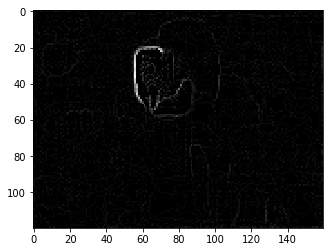

In [31]:
plt.imshow(lXX[20],'gray')
plt.show()

In [111]:
z = []
for i in range(len(lX)):
    z.append((i,np.count_nonzero(lX[i])))   

In [112]:
z.sort(key=lambda x: x[1],reverse=True)

In [113]:
z = z[0:150]

In [114]:
zz = []
for i in z:
    zz.append(i[0])

In [115]:
zz.sort()

In [116]:
print(zz)

[32, 33, 34, 37, 38, 39, 64, 66, 70, 72, 73, 87, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 130, 153, 166, 177, 179, 180, 181, 182, 183, 184, 197, 198, 199, 200, 201, 202, 204, 205, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 256, 262, 263, 265, 266, 267, 268, 273, 274, 275, 277, 278, 279, 280, 281, 282, 283, 285, 288, 289, 293, 294, 296, 298, 299, 300, 301, 309, 330, 334, 335, 336, 337, 339, 340, 341, 348, 357, 358]


In [125]:
f = []
for i in range(len(lX)):
    if i in zz:
        f.append(cv2.resize(lX[i],(50,50)))

In [126]:
f = np.array(f)

In [127]:
f = f.flatten()

In [128]:
f.shape

(375000,)

In [129]:
150*50*50

375000

In [130]:
f

array([179,  76,  76, ...,   0,   0,   0], dtype=uint8)

In [131]:
c = f[np.nonzero(f)]

In [132]:
c.shape

(19566,)

In [133]:
c

array([179,  76,  76, ...,  76, 127,  23], dtype=uint8)

In [47]:
a = [1,2,3,4,5,6,7,8,10]
a = np.array(a)
a = a[:3]

In [48]:
a

array([1, 2, 3])

In [115]:
winSize = (20,20)
blockSize = (10,10)
blockStride = (5,5)
cellSize = (10,10)
nbins = 9
derivAperture = 1
winSigma = -1.
histogramNormType = 0
L2HysThreshold = 0.2
gammaCorrection = 1
nlevels = 64
useSignedGradients = True
 
hog = cv2.HOGDescriptor(winSize,blockSize,blockStride,cellSize,nbins,derivAperture,winSigma,histogramNormType,L2HysThreshold,gammaCorrection,nlevels, useSignedGradients)

In [116]:
descriptor = hog.compute(XX[37])

In [124]:
winSize = (64,64)
blockSize = (16,16)
blockStride = (8,8)
cellSize = (8,8)
nbins = 9
derivAperture = 1
winSigma = 4.
histogramNormType = 0
L2HysThreshold = 2.0000000000000001e-01
gammaCorrection = 0
nlevels = 64
hog = cv2.HOGDescriptor(winSize,blockSize,blockStride,cellSize,nbins,derivAperture,winSigma,
                        histogramNormType,L2HysThreshold,gammaCorrection,nlevels)

In [126]:
winStride = (8,8)
padding = (8,8)
locations = ((10,20),)
descriptor = hog.compute(XX[37],winStride,padding,locations)

In [129]:
descriptor

array([[0.15314218],
       [0.05923971],
       [0.05867052],
       ...,
       [0.24580045],
       [0.24580045],
       [0.10020102]], dtype=float32)

In [36]:
np.count_nonzero(lXX[75])

8586

In [35]:
np.count_nonzero(lXX[18])

4612

In [38]:
np.mean(lXX[75])

2.2769791666666666

In [37]:
np.mean(lXX[18])

0.68453125

In [50]:
z = []
for i in range(len(lXX)):
    if np.mean(lXX[i]) < 1:
        z.append(i)

In [54]:
50*50*193

482500

In [72]:
c = np.copy(XX)

In [73]:
for i in range(len(c)-1):
    c[i] = c[i+1]-c[i]

array([  0,   0, 255,   0,   0, 255, 254, 255, 254, 254, 254, 254, 254,
       254, 253, 254, 254, 254, 254, 254, 254, 254, 255, 255, 255, 255,
       255,   0,   0,   0,   0, 255, 255, 253, 254, 255,   1,   1,   1,
         2,   2,   2,   1,   1,   0,   0,   0,   0,   0,   0,   1,   1,
         2,   2,   8,  60,  77,  63,  36,  18,   7, 252, 249, 248, 252,
       250, 250, 251, 252,   5,   0, 255,   3,   5,   6,   5,   5,   6,
         6,   8,  10,  11,  14,  14,  12,  15,  17,  15,  10,   3,   2,
         1, 255, 251, 250, 242, 229, 164, 138, 142, 185, 243, 247, 249,
       249, 248, 243, 243, 243, 245, 245, 247, 246, 247, 247, 248, 248,
       250, 250, 251, 252, 252, 252, 252, 252, 252, 252, 250, 249, 249,
       248, 247, 246, 245, 244, 245, 245, 246, 247, 249, 250, 251, 254,
         0,   2,   3,   5,   3,   3,   1,   1,   2,   0, 254, 253, 252,
       251, 251, 252, 253], dtype=uint8)

In [76]:
z = []

In [77]:
for i in range(len(c)):
    if sum(sum(c[i]/c[i].shape[1]))/(c[i].shape[0]) > 20:
        z.append(i)

In [79]:
len(z)

551

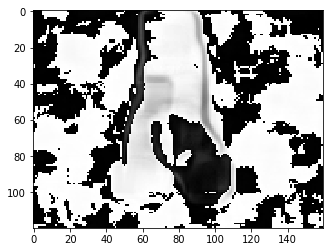

In [82]:
plt.imshow(c[38],'gray')
plt.show()

In [111]:
a = [1,   1,   2,   1,   1,   2,   3,   3,   4,   4,   4,   4,   4,
         4,   5,   4,   4,   4,   4,   4,   4,   4,   3,   3,   3,   3,
         3,   3,   3,   3,   3,   4,   4,   5,   4,   3,   2,   2,   1,
         1,   1,   0,   1,   1,   1,   1,   1,   1,   1,   1,   1,   2,
         2,   2,   3,   4,   2,  23,  55,  76,  89, 103, 109, 112, 111,
       114, 115, 116, 121, 121, 130, 133, 133, 133, 134, 135, 135, 135,
       136, 137, 137, 137, 136, 137, 141, 141, 141, 142, 146, 148, 148,
       148, 149, 148, 148, 148, 148, 150, 140, 128,  84,  23,  16,  12,
         9,   9,  13,  13,  13,  12,  12,  10,  11,  10,   9,   9,   9,
         7,   7,   6,   5,   5,   5,   5,   5,   5,   5,   7,   8,   8,
         9,  10,  11,  12,  13,  12,  12,  11,  10,   9,   8,   7,   5,
         3,   2,   1,   0,   2,   3,   5,   5,   4,   6,   7,   7,   8,
         9,   9,   9,   8] * 200
a = np.array(a)
a = a.reshape((int(a.shape[0]/200), 200))

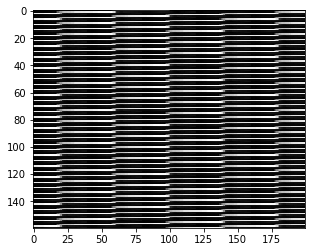

In [112]:
plt.imshow(a,'gray')
plt.show()

In [3]:
import sys
import cv2

hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())
hogParams = {'winStride': (8, 8), 'padding': (32, 32), 'scale': 1.05}

video = cv2.VideoCapture("test.avi")
x = []
while True:
    ret, frame = video.read()
    if not ret:
        break

    result = hog.detectMultiScale(frame, **hogParams)
    x.append(result)

In [6]:
x = np.array(x)

In [7]:
x.shape

(555, 2)

In [8]:
x.flatten()

array([(), (), (), ..., (), (), ()], dtype=object)

In [12]:
x.ravel()

array([(), (), (), ..., (), (), ()], dtype=object)

In [13]:
A = np.squeeze(np.asarray(x))

In [14]:
A

array([[(), ()],
       [(), ()],
       [(), ()],
       ...,
       [(), ()],
       [(), ()],
       [(), ()]], dtype=object)

In [152]:
import os
import cv2
import csv
import numpy as np
import random


##should be modify -> frame should contain all body of people
def extract(data, size):
    path = "_data/"
    base = path + data["fileName"].split('_')[1] + "/frames/"

    if not(os.path.exists(base)):
        os.makedirs(base)

    label = data["fileName"].split("_")[1]

    video_name = path + data["fileName"].split('_')[1] + "/" + data["fileName"] + "_uncomp.avi"

    vidcap = cv2.VideoCapture(video_name)
    success, image = vidcap.read()

    count = 0
    success = True
    return_data = []

    while success:
        success, image = vidcap.read()
        if(count > int(data["start"]) and count < int(data["end"])-10 and count%10==0):

#           cv2.imwrite(base + "/" + data["fileName"] + "_%d.jpg" %count, image)
            resize = cv2.resize(image, (size[0], size[1]))
            img = np.array(resize)

            return_data.append({"image":img, "label":label})
        elif(count > int(data["end"])-10):
            break
        count = count + 1

    return return_data
# extract farme data["start"] ~ data["end"] in videon_name
# form -> frame\tlabel


# _data/running/person01_running_d1_uncomp.avi
def prepare(size):
    path = "_data/"
    data_seq = "_data/frame_sequence.txt"

    form = {"fileName":None, "start":None, "end":None}

    lines = [line.rstrip('\n').rstrip('\r').split("\t") for line in open(data_seq)]
    
    lines = lines[:200]

    label = [l[0].rstrip() for l in lines]
    _frame = [l[-1].split(", ") for l in lines]

    result = []

    for f, l in zip(_frame, label):
        for ff in f:
            start = ff.split("-")[0]
            end = ff.split("-")[1]
            form = {"fileName" : l, "start":start, "end":end}
            result.append(form)

    d = []
    count = 1
    for data in result:
        print(data["fileName"])
        d = d + extract(data, size)
        count = count + 1


# [
# {"image" : [[[],[],[]]], "label" : label}
# {"image" : [[[],[],[]]], "label" : label}
# {"image" : [[[],[],[]]], "label" : label}...
# ]
    return d


def make_train_data(data):
    length_data = len(data)
    
    random.shuffle(data)
    
    x = np.array([d["image"] for d in data])
    _y = np.array([d["label"] for d in data])

    y = np.zeros((len(_y), len(set(_y))))
    y[np.arange(len(_y)), [list(set(_y)).index(i) for i in _y]] = 1


    l = int(length_data/10)

    train_x = x[l:]
    train_y = y[l:]

    test_x = x[:l]
    test_y = y[:l]


    return [train_x, train_y, test_x, test_y]

In [153]:
import tensorflow as tf
import numpy as np
import random

def run(data, batch_size, epoch):
    train_x = data[0]
    train_y = data[1]
    test_x = data[2]
    test_y = data[3]
    print(train_x.shape)
    print(train_y.shape)
    print(test_x.shape)
    print(test_y.shape)

    train_len = len(train_x)
    num_out = len(train_y[0])

    train_y = train_y.reshape(-1, num_out)
    test_y = test_y.reshape(-1, num_out)
#    X -> fix
#    Y -> can be changed
    X = tf.placeholder(tf.float32, [None, 60, 80, 3])
    Y = tf.placeholder(tf.float32, [None, num_out])
    keep_prob = tf.placeholder(tf.float32)

#    no padding -> edge == trash data
    W1 = tf.Variable(tf.random_normal([3, 3, 3, 6], stddev=0.01))
    C1 = tf.nn.conv2d(X, W1, strides=[1, 1, 1, 1], padding='SAME')
    L1 = tf.nn.relu(C1)
    P1 = tf.nn.max_pool(L1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    D1 = tf.nn.dropout(P1, keep_prob=keep_prob)

#    print(P1)
#    P1 -> (?, 30, 40, 6)


    W2 = tf.Variable(tf.random_normal([3, 3, 6, 12], stddev=0.01))
    C2 = tf.nn.conv2d(D1, W2, strides=[1, 1, 1, 1], padding='SAME')
    L2 = tf.nn.relu(C2)
    P2 = tf.nn.max_pool(L2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    D2 = tf.nn.dropout(P2, keep_prob=keep_prob)

#    print(P2)
#    P2 -> (?, 15, 20, 12)


    #W3 = tf.Variable(tf.random_normal([30*40*12, 30*40*12], stddev=0.01))
    W3 = tf.get_variable("W3", shape=[15*20*12, 15*20*12], initializer=tf.contrib.layers.xavier_initializer())
    b3 = tf.Variable(tf.random_normal([15*20*12]))
    L3 = tf.reshape(D2, [-1, 15*20*12])
    L3 = tf.nn.relu(tf.matmul(L3, W3)+b3)
    D3 = tf.nn.dropout(L3, keep_prob=keep_prob)


    #W4 = tf.Variable(tf.random_normal([30*40*12, num_out], stddev=0.01))
    W4 = tf.get_variable("W4", shape=[15*20*12, num_out], initializer=tf.contrib.layers.xavier_initializer())
    b4 = tf.Variable(tf.random_normal([num_out]))
    model = tf.matmul(D3, W4) + b4
  

    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=model, labels=Y))
    optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)
    #optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.01).minimize(cost)

    init = tf.global_variables_initializer()

    with tf.Session() as sess:
        sess.run(init)

        total_batch = int(train_len/batch_size)
        if(total_batch == 0):
            total_batch = 1

        for e in range(epoch):
            total_cost = 0

            j = 0
            for i in range(total_batch):
                if(j+batch_size > len(train_x)):
                    batch_x = train_x[j:]
                    batch_y = train_y[j:]
                else:
                    batch_x = train_x[j:j+batch_size]
                    batch_y = train_y[j:j+batch_size]
                    j = j+batch_size

                batch_y = batch_y.reshape(-1, num_out)
    #            print(type(batch_x))
    #            print(batch_x.shape)
    #            print(type(batch_y))
    #            print(batch_y.shape)
                _, cost_val = sess.run([optimizer, cost], feed_dict={X:batch_x, Y:batch_y, keep_prob:1})

                total_cost = total_cost + cost_val

            print('Epoch:', '%d' % (e + 1), 'Average cost =', '{:.3f}'.format(total_cost / total_batch))

        print("complete")

        is_correct = tf.equal(tf.argmax(model, 1), tf.argmax(Y, 1))
        accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
        #print('accuracy: ', sess.run(accuracy, feed_dict={X: test_x, Y: test_y}))
        print("\naccuracy: ", "{:.2f}".format(accuracy.eval(feed_dict={X:test_x, Y:test_y, keep_prob:1})*100), "%")

        print("Label: ", sess.run(tf.argmax(test_y, 1)))
        print("Prediction: ", sess.run(tf.argmax(model, 1), feed_dict={X: test_x, keep_prob:1}))

In [154]:
# from cnn.action_recog import run
# from data.prepare import prepare, make_train_data

size = [80, 60]

d = prepare(size)
data = make_train_data(d)


epoch = 20
batch_size = 100
run(data, batch_size, epoch)

person01_boxing_d1
person01_boxing_d1
person01_boxing_d1
person01_boxing_d1
person01_boxing_d2
person01_boxing_d2
person01_boxing_d2
person01_boxing_d2
person01_boxing_d3
person01_boxing_d3
person01_boxing_d3
person01_boxing_d3
person01_boxing_d4
person01_boxing_d4
person01_boxing_d4
person01_boxing_d4
person01_handclapping_d1
person01_handclapping_d1
person01_handclapping_d1
person01_handclapping_d1
person01_handclapping_d2
person01_handclapping_d2
person01_handclapping_d2
person01_handclapping_d2
person01_handclapping_d3
person01_handclapping_d3
person01_handclapping_d3
person01_handclapping_d3
person01_handclapping_d4
person01_handclapping_d4
person01_handclapping_d4
person01_handclapping_d4
person01_handwaving_d1
person01_handwaving_d1
person01_handwaving_d1
person01_handwaving_d1
person01_handwaving_d2
person01_handwaving_d2
person01_handwaving_d2
person01_handwaving_d2
person01_handwaving_d3
person01_handwaving_d3
person01_handwaving_d3
person01_handwaving_d3
person01_handwaving_

person05_boxing_d2
person05_boxing_d3
person05_boxing_d3
person05_boxing_d3
person05_boxing_d3
person05_boxing_d4
person05_boxing_d4
person05_boxing_d4
person05_boxing_d4
person05_handclapping_d1
person05_handclapping_d1
person05_handclapping_d1
person05_handclapping_d1
person05_handclapping_d2
person05_handclapping_d2
person05_handclapping_d2
person05_handclapping_d2
person05_handclapping_d3
person05_handclapping_d3
person05_handclapping_d3
person05_handclapping_d3
person05_handclapping_d4
person05_handclapping_d4
person05_handclapping_d4
person05_handclapping_d4
person05_handwaving_d1
person05_handwaving_d1
person05_handwaving_d1
person05_handwaving_d1
person05_handwaving_d2
person05_handwaving_d2
person05_handwaving_d2
person05_handwaving_d2
person05_handwaving_d3
person05_handwaving_d3
person05_handwaving_d3
person05_handwaving_d3
person05_handwaving_d4
person05_handwaving_d4
person05_handwaving_d4
person05_handwaving_d4
person05_jogging_d1
person05_jogging_d1
person05_jogging_d1
p

person09_boxing_d4
person09_boxing_d4
person09_boxing_d4
person09_boxing_d4
person09_handclapping_d1
person09_handclapping_d1
person09_handclapping_d1
person09_handclapping_d1
person09_handclapping_d2
person09_handclapping_d2
person09_handclapping_d2
person09_handclapping_d2
person09_handclapping_d3
person09_handclapping_d3
person09_handclapping_d3
person09_handclapping_d3
person09_handclapping_d4
person09_handclapping_d4
person09_handclapping_d4
person09_handclapping_d4
(5676, 60, 80, 3)
(5676, 6)
(630, 60, 80, 3)
(630, 6)
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


ModuleNotFoundError: No module named 'tensorflow.python.saved_model.model_utils'

In [155]:
tf.__version__

'1.13.1'

In [9]:
import imageio
import cv2
import numpy as np
import os
import pickle
import re

from PIL import Image
from scipy.misc.pilutil import imresize

CATEGORIES = [
    "boxing",
    "handclapping",
    "handwaving",
    "jogging",
    "running",
    "walking"
]

# Dataset are divided according to the instruction at:
# http://www.nada.kth.se/cvap/actions/00sequences.txt
TRAIN_PEOPLE_ID = [11, 12, 13, 14, 15, 16, 17, 18]
DEV_PEOPLE_ID = [19, 20, 21, 23, 24, 25, 1, 4]
TEST_PEOPLE_ID = [22, 2, 3, 5, 6, 7, 8, 9, 10]

def make_raw_dataset(dataset="train"):
    if dataset == "train":
        ID = TRAIN_PEOPLE_ID
    elif dataset == "dev":
        ID = DEV_PEOPLE_ID
    else:
        ID = TEST_PEOPLE_ID

    frames_idx = parse_sequence_file()

    data = []

    for category in CATEGORIES:
        # Get all files in current category's folder.
        folder_path = os.path.join("..", "dataset", category)
        filenames = sorted(os.listdir(folder_path))

        for filename in filenames:
            filepath = os.path.join("..", "dataset", category, filename)
            print(filename)
            # Get id of person in this video.
            person_id = int(filename.split("_")[0][6:])
            if person_id not in ID:
                continue

            vid = imageio.get_reader(filepath, "ffmpeg")

            frames = []

            # Add each frame to correct list.
            for i, frame in enumerate(vid):
                # Boolean flag to check if current frame contains human.
                ok = False
                for seg in frames_idx[filename]:
                    if i >= seg[0] and i <= seg[1]:
                        ok = True
                        break
                if not ok:
                    continue

                # Convert to grayscale.
                frame = Image.fromarray(np.array(frame))
                frame = frame.convert("L")
                frame = np.array(frame.getdata(),
                                 dtype=np.uint8).reshape((120, 160))
                frame = imresize(frame, (60, 80))

                frames.append(frame)

            data.append({
                "filename": filename,
                "category": category,
                "frames": frames    
            })

    pickle.dump(data, open("data/%s.p" % dataset, "wb"))
    
def make_optflow_dataset(dataset="train"):
    if dataset == "train":
        ID = TRAIN_PEOPLE_ID
    elif dataset == "dev":
        ID = DEV_PEOPLE_ID
    else:
        ID = TEST_PEOPLE_ID

    # Setup parameters for optical flow.
    farneback_params = dict(
        winsize=20, iterations=1,
        flags=cv2.OPTFLOW_FARNEBACK_GAUSSIAN, levels=1,
        pyr_scale=0.5, poly_n=5, poly_sigma=1.1, flow=None)

    frames_idx = parse_sequence_file()

    data = []

    for category in CATEGORIES:
        # Get all files in current category's folder.
        folder_path = os.path.join("..", "dataset", category)
        filenames = sorted(os.listdir(folder_path))

        for filename in filenames:
            filepath = os.path.join("..", "dataset", category, filename)

            # Get id of person in this video.
            person_id = int(filename.split("_")[0][6:])
            if person_id not in ID:
                continue
            print(category,filename)
            vid = imageio.get_reader(filepath, "ffmpeg")

            flow_x = []
            flow_y = []

            prev_frame = None
            # Add each frame to correct list.
            for i, frame in enumerate(vid):
                # Boolean flag to check if current frame contains human.
                ok = False
                for seg in frames_idx[filename]:
                    if i >= seg[0] and i <= seg[1]:
                        ok = True
                        break
                if not ok:
                    continue

                # Convert to grayscale.
                frame = Image.fromarray(np.array(frame))
                frame = frame.convert("L")
                frame = np.array(frame.getdata(),
                                 dtype=np.uint8).reshape((120, 160))
                frame = imresize(frame, (60, 80))

                if prev_frame is not None:
                    # Calculate optical flow.
                    flows = cv2.calcOpticalFlowFarneback(prev_frame, frame,
                                                         **farneback_params)
                    subsampled_x = np.zeros((30, 40), dtype=np.float32)
                    subsampled_y = np.zeros((30, 40), dtype=np.float32)

                    for r in range(30):
                        for c in range(40):
                            subsampled_x[r, c] = flows[r*2, c*2, 0]
                            subsampled_y[r, c] = flows[r*2, c*2, 1]

                    flow_x.append(subsampled_x)
                    flow_y.append(subsampled_y)

                prev_frame = frame

            data.append({
                "filename": filename,
                "category": category,
                "flow_x": flow_x,
                "flow_y": flow_y    
            })

    pickle.dump(data, open("data/%s_flow.p" % dataset, "wb"))

def parse_sequence_file():
    print("Parsing ../dataset/00sequences.txt")

    # Read 00sequences.txt file.
    with open('../dataset/00sequences.txt', 'r') as content_file:
        content = content_file.read()

    # Replace tab and newline character with space, then split file's content
    # into strings.
    content = re.sub("[\t\n]", " ", content).split()

    # Dictionary to keep ranges of frames with humans.
    # Example:
    # video "person01_boxing_d1": [(1, 95), (96, 185), (186, 245), (246, 360)].
    frames_idx = {}

    # Current video that we are parsing.
    current_filename = ""

    for s in content:
        if s == "frames":
            # Ignore this token.
            continue
        elif s.find("-") >= 0:
            # This is the token we are looking for. e.g. 1-95.
            if s[len(s) - 1] == ',':
                # Remove comma.
                s = s[:-1]

            # Split into 2 numbers => [1, 95]
            idx = s.split("-")

            # Add to dictionary.
            if not current_filename in frames_idx:
                frames_idx[current_filename] = []
            frames_idx[current_filename].append((int(idx[0]), int(idx[1])))
        else:
            # Parse next file.
            current_filename = s + "_uncomp.avi"

    return frames_idx

if __name__ == "__main__":
    print("Making raw train dataset")
    make_raw_dataset(dataset="train")
    print("Making raw dev dataset")
    make_raw_dataset(dataset="dev")
    print("Making raw test dataset")
    make_raw_dataset(dataset="test")

    print("Making optical flow features for train dataset")
#     make_optflow_dataset(dataset="train")
    print("Making optical flow features for dev dataset")
#     make_optflow_dataset(dataset="dev")
    print("Making optical flow features for test dataset")
#     make_optflow_dataset(dataset="test")

Making raw train dataset
Parsing ../dataset/00sequences.txt
person01_boxing_d1_uncomp.avi
person01_boxing_d2_uncomp.avi
person01_boxing_d3_uncomp.avi
person01_boxing_d4_uncomp.avi
person02_boxing_d1_uncomp.avi
person02_boxing_d2_uncomp.avi
person02_boxing_d3_uncomp.avi
person02_boxing_d4_uncomp.avi
person03_boxing_d1_uncomp.avi
person03_boxing_d2_uncomp.avi
person03_boxing_d3_uncomp.avi
person03_boxing_d4_uncomp.avi
person04_boxing_d1_uncomp.avi
person04_boxing_d2_uncomp.avi
person04_boxing_d3_uncomp.avi
person04_boxing_d4_uncomp.avi
person05_boxing_d1_uncomp.avi
person05_boxing_d2_uncomp.avi
person05_boxing_d3_uncomp.avi
person05_boxing_d4_uncomp.avi
person06_boxing_d1_uncomp.avi
person06_boxing_d2_uncomp.avi
person06_boxing_d3_uncomp.avi
person06_boxing_d4_uncomp.avi
person07_boxing_d1_uncomp.avi
person07_boxing_d2_uncomp.avi
person07_boxing_d3_uncomp.avi
person07_boxing_d4_uncomp.avi
person08_boxing_d1_uncomp.avi
person08_boxing_d2_uncomp.avi
person08_boxing_d3_uncomp.avi
person08_b

c:\python37\lib\site-packages\ipykernel_launcher.py:71: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.


person11_boxing_d2_uncomp.avi
person11_boxing_d3_uncomp.avi
person11_boxing_d4_uncomp.avi
person12_boxing_d1_uncomp.avi
person12_boxing_d2_uncomp.avi
person12_boxing_d3_uncomp.avi
person12_boxing_d4_uncomp.avi
person13_boxing_d1_uncomp.avi
person13_boxing_d2_uncomp.avi
person13_boxing_d3_uncomp.avi
person13_boxing_d4_uncomp.avi
person14_boxing_d1_uncomp.avi
person14_boxing_d2_uncomp.avi
person14_boxing_d3_uncomp.avi
person14_boxing_d4_uncomp.avi
person15_boxing_d1_uncomp.avi
person15_boxing_d2_uncomp.avi
person15_boxing_d3_uncomp.avi
person15_boxing_d4_uncomp.avi
person16_boxing_d1_uncomp.avi
person16_boxing_d2_uncomp.avi
person16_boxing_d3_uncomp.avi
person16_boxing_d4_uncomp.avi
person17_boxing_d1_uncomp.avi
person17_boxing_d2_uncomp.avi
person17_boxing_d3_uncomp.avi
person17_boxing_d4_uncomp.avi
person18_boxing_d1_uncomp.avi
person18_boxing_d2_uncomp.avi
person18_boxing_d3_uncomp.avi
person18_boxing_d4_uncomp.avi
person19_boxing_d1_uncomp.avi
person19_boxing_d2_uncomp.avi
person19_b

person11_jogging_d2_uncomp.avi
person11_jogging_d3_uncomp.avi
person11_jogging_d4_uncomp.avi
person12_jogging_d1_uncomp.avi
person12_jogging_d2_uncomp.avi
person12_jogging_d3_uncomp.avi
person12_jogging_d4_uncomp.avi
person13_jogging_d1_uncomp.avi
person13_jogging_d2_uncomp.avi
person13_jogging_d3_uncomp.avi
person13_jogging_d4_uncomp.avi
person14_jogging_d1_uncomp.avi
person14_jogging_d2_uncomp.avi
person14_jogging_d3_uncomp.avi
person14_jogging_d4_uncomp.avi
person15_jogging_d1_uncomp.avi
person15_jogging_d2_uncomp.avi
person15_jogging_d3_uncomp.avi
person15_jogging_d4_uncomp.avi
person16_jogging_d1_uncomp.avi
person16_jogging_d2_uncomp.avi
person16_jogging_d3_uncomp.avi
person16_jogging_d4_uncomp.avi
person17_jogging_d1_uncomp.avi
person17_jogging_d2_uncomp.avi
person17_jogging_d3_uncomp.avi
person17_jogging_d4_uncomp.avi
person18_jogging_d1_uncomp.avi
person18_jogging_d2_uncomp.avi
person18_jogging_d3_uncomp.avi
person18_jogging_d4_uncomp.avi
person19_jogging_d1_uncomp.avi
person19

person19_boxing_d2_uncomp.avi
person19_boxing_d3_uncomp.avi
person19_boxing_d4_uncomp.avi
person20_boxing_d1_uncomp.avi
person20_boxing_d2_uncomp.avi
person20_boxing_d3_uncomp.avi
person20_boxing_d4_uncomp.avi
person21_boxing_d1_uncomp.avi
person21_boxing_d2_uncomp.avi
person21_boxing_d3_uncomp.avi
person21_boxing_d4_uncomp.avi
person22_boxing_d1_uncomp.avi
person22_boxing_d2_uncomp.avi
person22_boxing_d3_uncomp.avi
person22_boxing_d4_uncomp.avi
person23_boxing_d1_uncomp.avi
person23_boxing_d2_uncomp.avi
person23_boxing_d3_uncomp.avi
person23_boxing_d4_uncomp.avi
person24_boxing_d1_uncomp.avi
person24_boxing_d2_uncomp.avi
person24_boxing_d3_uncomp.avi
person01_handclapping_d1_uncomp.avi
person01_handclapping_d2_uncomp.avi
person01_handclapping_d3_uncomp.avi
person01_handclapping_d4_uncomp.avi
person02_handclapping_d1_uncomp.avi
person02_handclapping_d2_uncomp.avi
person02_handclapping_d3_uncomp.avi
person02_handclapping_d4_uncomp.avi
person03_handclapping_d1_uncomp.avi
person03_handcla

person19_jogging_d2_uncomp.avi
person19_jogging_d3_uncomp.avi
person19_jogging_d4_uncomp.avi
person20_jogging_d1_uncomp.avi
person20_jogging_d2_uncomp.avi
person20_jogging_d3_uncomp.avi
person20_jogging_d4_uncomp.avi
person21_jogging_d1_uncomp.avi
person21_jogging_d2_uncomp.avi
person21_jogging_d3_uncomp.avi
person21_jogging_d4_uncomp.avi
person22_jogging_d1_uncomp.avi
person22_jogging_d2_uncomp.avi
person22_jogging_d3_uncomp.avi
person22_jogging_d4_uncomp.avi
person23_jogging_d1_uncomp.avi
person23_jogging_d2_uncomp.avi
person23_jogging_d3_uncomp.avi
person23_jogging_d4_uncomp.avi
person24_jogging_d1_uncomp.avi
person24_jogging_d2_uncomp.avi
person24_jogging_d3_uncomp.avi
person24_jogging_d4_uncomp.avi
person25_jogging_d1_uncomp.avi
person25_jogging_d2_uncomp.avi
person25_jogging_d3_uncomp.avi
person25_jogging_d4_uncomp.avi
person01_running_d1_uncomp.avi
person01_running_d2_uncomp.avi
person01_running_d3_uncomp.avi
person01_running_d4_uncomp.avi
person02_running_d1_uncomp.avi
person02

person22_boxing_d2_uncomp.avi
person22_boxing_d3_uncomp.avi
person22_boxing_d4_uncomp.avi
person23_boxing_d1_uncomp.avi
person23_boxing_d2_uncomp.avi
person23_boxing_d3_uncomp.avi
person23_boxing_d4_uncomp.avi
person24_boxing_d1_uncomp.avi
person24_boxing_d2_uncomp.avi
person24_boxing_d3_uncomp.avi
person01_handclapping_d1_uncomp.avi
person01_handclapping_d2_uncomp.avi
person01_handclapping_d3_uncomp.avi
person01_handclapping_d4_uncomp.avi
person02_handclapping_d1_uncomp.avi
person02_handclapping_d2_uncomp.avi
person02_handclapping_d3_uncomp.avi
person02_handclapping_d4_uncomp.avi
person03_handclapping_d1_uncomp.avi
person03_handclapping_d2_uncomp.avi
person03_handclapping_d3_uncomp.avi
person03_handclapping_d4_uncomp.avi
person04_handclapping_d1_uncomp.avi
person04_handclapping_d2_uncomp.avi
person04_handclapping_d3_uncomp.avi
person04_handclapping_d4_uncomp.avi
person05_handclapping_d1_uncomp.avi
person05_handclapping_d2_uncomp.avi
person05_handclapping_d3_uncomp.avi
person05_handcla

person22_jogging_d2_uncomp.avi
person22_jogging_d3_uncomp.avi
person22_jogging_d4_uncomp.avi
person23_jogging_d1_uncomp.avi
person23_jogging_d2_uncomp.avi
person23_jogging_d3_uncomp.avi
person23_jogging_d4_uncomp.avi
person24_jogging_d1_uncomp.avi
person24_jogging_d2_uncomp.avi
person24_jogging_d3_uncomp.avi
person24_jogging_d4_uncomp.avi
person25_jogging_d1_uncomp.avi
person25_jogging_d2_uncomp.avi
person25_jogging_d3_uncomp.avi
person25_jogging_d4_uncomp.avi
person01_running_d1_uncomp.avi
person01_running_d2_uncomp.avi
person01_running_d3_uncomp.avi
person01_running_d4_uncomp.avi
person02_running_d1_uncomp.avi
person02_running_d2_uncomp.avi
person02_running_d3_uncomp.avi
person02_running_d4_uncomp.avi
person03_running_d1_uncomp.avi
person03_running_d2_uncomp.avi
person03_running_d3_uncomp.avi
person03_running_d4_uncomp.avi
person04_running_d1_uncomp.avi
person04_running_d2_uncomp.avi
person04_running_d3_uncomp.avi
person04_running_d4_uncomp.avi
person05_running_d1_uncomp.avi
person05

In [3]:
# from dataset import *
from torch.autograd import Variable

import argparse
import torch
import torch.nn as nn

class CNNBlockFrameFlow(nn.Module):
    def __init__(self):
        super(CNNBlockFrameFlow, self).__init__()

        self.conv1_frame = nn.Sequential(
            nn.Conv3d(1, 16, kernel_size=(4, 5, 5)),
            nn.BatchNorm3d(16),
            nn.ReLU(),
            nn.MaxPool3d(kernel_size=(1, 2, 2)),
            nn.Dropout(0.5))
        self.conv2_frame = nn.Sequential(
            nn.Conv3d(16, 32, kernel_size=(4, 3, 3)),
            nn.BatchNorm3d(32),
            nn.ReLU(),
            nn.MaxPool3d(kernel_size=(2, 2, 2)),
            nn.Dropout(0.5))
        self.conv3_frame = nn.Sequential(
            nn.Conv3d(32, 64, kernel_size=(3, 3, 3)),
            nn.BatchNorm3d(64),
            nn.ReLU(),
            nn.MaxPool3d(kernel_size=(2, 2, 2)),
            nn.Dropout(0.5))

        self.conv1_flow_x = nn.Sequential(
            nn.Conv3d(1, 16, kernel_size=(3, 3, 3)),
            nn.BatchNorm3d(16),
            nn.ReLU(),
            nn.MaxPool3d(kernel_size=(1, 2, 2)),
            nn.Dropout(0.5))
        self.conv2_flow_x = nn.Sequential(
            nn.Conv3d(16, 32, kernel_size=(3, 3, 3)),
            nn.BatchNorm3d(32),
            nn.ReLU(),
            nn.MaxPool3d(kernel_size=(2, 2, 2)),
            nn.Dropout(0.5))
        self.conv3_flow_x = nn.Sequential(
            nn.Conv3d(32, 64, kernel_size=(3, 3, 3)),
            nn.BatchNorm3d(64),
            nn.ReLU(),
            nn.MaxPool3d(kernel_size=(2, 2, 2)),
            nn.Dropout(0.5))

        self.conv1_flow_y = nn.Sequential(
            nn.Conv3d(1, 16, kernel_size=(3, 3, 3)),
            nn.BatchNorm3d(16),
            nn.ReLU(),
            nn.MaxPool3d(kernel_size=(1, 2, 2)),
            nn.Dropout(0.5))
        self.conv2_flow_y = nn.Sequential(
            nn.Conv3d(16, 32, kernel_size=(3, 3, 3)),
            nn.BatchNorm3d(32),
            nn.ReLU(),
            nn.MaxPool3d(kernel_size=(2, 2, 2)),
            nn.Dropout(0.5))
        self.conv3_flow_y = nn.Sequential(
            nn.Conv3d(32, 64, kernel_size=(3, 3, 3)),
            nn.BatchNorm3d(64),
            nn.ReLU(),
            nn.MaxPool3d(kernel_size=(2, 2, 2)),
            nn.Dropout(0.5))

        self.fc1 = nn.Linear(3328, 128)
        self.dropfc1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(128, 6)

    def forward(self, frames, flow_x, flow_y):
        out_frames = self.conv1_frame(frames)
        out_frames = self.conv2_frame(out_frames)
        out_frames = self.conv3_frame(out_frames)
        out_frames = out_frames.view(out_frames.size(0), -1)

        out_flow_x = self.conv1_flow_x(flow_x)
        out_flow_x = self.conv2_flow_x(out_flow_x)
        out_flow_x = self.conv3_flow_x(out_flow_x)
        out_flow_x = out_flow_x.view(out_flow_x.size(0), -1)

        out_flow_y = self.conv1_flow_y(flow_y)
        out_flow_y = self.conv2_flow_y(out_flow_y)
        out_flow_y = self.conv3_flow_y(out_flow_y)
        out_flow_y = out_flow_y.view(out_flow_y.size(0), -1)

        out = torch.cat([out_frames, out_flow_x, out_flow_y], 1)
        out = self.fc1(out)
        out = nn.ReLU()(out)
        out = self.dropfc1(out)
        out = self.fc2(out)

        return out

In [6]:
import os
import torch
import torch.nn as nn

from torch.autograd import Variable

def get_outputs(model, instances, flow=False, use_cuda=False):

    if flow:
        frames = Variable(instances["frames"])
        flow_x = Variable(instances["flow_x"])
        flow_y = Variable(instances["flow_y"])

        if use_cuda:
            frames = frames.cuda()
            flow_x = flow_x.cuda()
            flow_y = flow_y.cuda()

        outputs = model(frames, flow_x, flow_y)

    else:
        instances = Variable(instances)
        if use_cuda:
            instances = instances.cuda()

        outputs = model(instances)

    return outputs

def evaluate(model, dataloader, flow=False, use_cuda=False):
    loss = 0
    correct = 0
    total = 0

    # Switch to evaluation mode.
    model.eval()

    for i, samples in enumerate(dataloader):
        outputs = get_outputs(model, samples["instance"], flow=flow,
                              use_cuda=use_cuda)
        
        labels = Variable(samples["label"])
        if use_cuda:
            labels = labels.cuda()

        loss += nn.CrossEntropyLoss(size_average=False)(outputs, labels).data[0]

        score, predicted = torch.max(outputs, 1)
        correct += (labels.data == predicted.data).sum()
        
        total += labels.size(0)

    acc = correct / total
    loss /= total

    return loss, acc

def train(model, num_epochs, train_set, dev_set, lr=1e-3, batch_size=32,
          start_epoch=1, log=10, checkpoint_path=None, validate=True,
          resume=False, flow=False, use_cuda=False):

    train_loader = torch.utils.data.DataLoader(
        dataset=train_set, batch_size=batch_size, shuffle=True)

    # Must be sequential b/c this is used for evaluation.
    train_loader_sequential = torch.utils.data.DataLoader(
        dataset=train_set, batch_size=batch_size, shuffle=False)
    dev_loader = torch.utils.data.DataLoader(
        dataset=dev_set, batch_size=batch_size, shuffle=False)

    # Use Adam optimizer.
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)

    # Record loss + accuracy.
    hist = []

    # Check if we are resuming training from a previous checkpoint.
    if resume:
        checkpoint = torch.load(os.path.join(
            checkpoint_path, "model_epoch%d.chkpt" % (start_epoch - 1)))

        model.load_state_dict(checkpoint["model"])
        optimizer.load_state_dict(checkpoint["optimizer"])

        hist = checkpoint["hist"]

    if use_cuda:
        model.cuda()
        criterion = nn.CrossEntropyLoss().cuda()
    else:
        criterion = nn.CrossEntropyLoss()

    for epoch in range(start_epoch, start_epoch + num_epochs):
        # Switch to train mode.
        model.train()

        for i, samples in enumerate(train_loader):

            labels = Variable(samples["label"])
            if use_cuda:
                labels = labels.cuda()

            # Zero out gradient from previous iteration.
            optimizer.zero_grad()

            # Forward, backward, and optimize.
            outputs = get_outputs(model, samples["instance"], flow=flow,
                                  use_cuda=use_cuda)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            if (i+1) % log == 0:
                print("epoch %d/%d, iteration %d/%d, loss: %s"
                      % (epoch, start_epoch + num_epochs - 1, i + 1,
                      len(train_set) // batch_size, loss.data[0]))
        
        # Get overall loss & accuracy on training set.
        train_loss, train_acc = evaluate(model, train_loader_sequential,
                                         flow=flow, use_cuda=use_cuda)

        if validate:
            # Get overall loss & accuracy on dev set.
            dev_loss, dev_acc = evaluate(model, dev_loader, flow=flow,
                                         use_cuda=use_cuda)

            print("epoch %d/%d, train_loss = %s, traic_acc = %s, "
                  "dev_loss = %s, dev_acc = %s"
                  % (epoch, start_epoch + num_epochs - 1,
                  train_loss, train_acc, dev_loss, dev_acc))

            hist.append({
                "train_loss": train_loss, "train_acc": train_acc,
                "dev_loss": dev_loss, "dev_acc": dev_acc
            })
        else:
            print("epoch %d/%d, train_loss = %s, train_acc = %s" % (epoch,
                  start_epoch + num_epochs - 1, train_loss, train_acc))

            hist.append({
                "train_loss": train_loss, "train_acc": train_acc
            })

        optimizer.zero_grad()
        checkpoint = {
            "model": model.state_dict(),
            "optimizer": optimizer.state_dict(),
            "hist": hist
        }

        # Save checkpoint.
        torch.save(checkpoint, os.path.join(
            checkpoint_path, "model_epoch%d.chkpt" % epoch))



In [7]:
import argparse
import os

# from dataset import *
# from models.cnn_block_frame_flow import CNNBlockFrameFlow
# from train_helper import *

if __name__ == "__main__":
    parser = argparse.ArgumentParser(description="Block Frame&Flow ConvNet")
    parser.add_argument("--dataset_dir", type=str, default="data",
                        help="directory to dataset")
    parser.add_argument("--batch_size", type=int, default=64,
                        help="batch size for training (default: 64)")
    parser.add_argument("--num_epochs", type=int, default=3,
                        help="number of epochs to train (default: 3)")
    parser.add_argument("--start_epoch", type=int, default=1,
                        help="start index of epoch (default: 1)")
    parser.add_argument("--lr", type=float, default=0.001,
                        help="learning rate for training (default: 0.001)")
    parser.add_argument("--log", type=int, default=10,
                        help="log frequency (default: 10 iterations)")
    parser.add_argument("--cuda", type=int, default=0,
                        help="whether to use cuda (default: 0)")
    args = parser.parse_args()

    dataset_dir = args.dataset_dir
    batch_size = args.batch_size
    num_epochs = args.num_epochs
    start_epoch = args.start_epoch
    lr = args.lr
    log_interval = args.log

    if args.cuda == 1:
        cuda = True
    else:
        cuda = False

    print("Loading dataset")
    train_set = BlockFrameFlowDataset(dataset_dir, "train")
    dev_set = BlockFrameFlowDataset(dataset_dir, "dev")
    train_set.zero_center(train_set.mean)
    dev_set.zero_center(train_set.mean)

    # Create model and optimizer.
    model = CNNBlockFrameFlow()

    if start_epoch > 1:
        resume = True
    else:
        resume = False

    # Create directory for storing checkpoints.
    os.makedirs(os.path.join(dataset_dir, "cnn_block_frame_flow"),
                exist_ok=True)

    print("Start training")
    train(model, num_epochs, train_set, dev_set, lr=lr, batch_size=batch_size,
          start_epoch=start_epoch, log=log_interval, 
          checkpoint_path=os.path.join(dataset_dir, "cnn_block_frame_flow"),
          validate=True, resume=resume, flow=True, use_cuda=cuda)

usage: ipykernel_launcher.py [-h] [--dataset_dir DATASET_DIR]
                             [--batch_size BATCH_SIZE]
                             [--num_epochs NUM_EPOCHS]
                             [--start_epoch START_EPOCH] [--lr LR] [--log LOG]
                             [--cuda CUDA]
ipykernel_launcher.py: error: unrecognized arguments: -f C:\Users\amsbo\AppData\Roaming\jupyter\runtime\kernel-791f49df-882f-404a-9dab-b920531f9063.json


SystemExit: 2

c:\python37\lib\site-packages\IPython\core\interactiveshell.py:3299: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [8]:
%tb

SystemExit: 2